# Image Classification with CNN on CIFAR-10 Dataset

In [13]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [14]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [15]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
# Define class labels
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

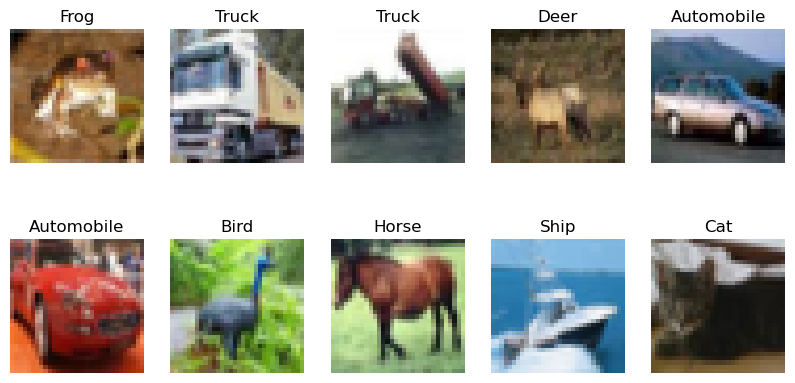

In [17]:
# Visualize a few sample images from the training dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [18]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 40s 46ms/step - loss: 1.7196 - accuracy: 0.3673 - val_loss: 1.3857 - val_accuracy: 0.5122
Epoch 2/10
782/782 [==============================] - 35s 44ms/step - loss: 1.4038 - accuracy: 0.4948 - val_loss: 1.1987 - val_accuracy: 0.5826
Epoch 3/10
782/782 [==============================] - 37s 47ms/step - loss: 1.2744 - accuracy: 0.5461 - val_loss: 1.0975 - val_accuracy: 0.6261
Epoch 4/10
782/782 [==============================] - 39s 50ms/step - loss: 1.1979 - accuracy: 0.5759 - val_loss: 1.0222 - val_accuracy: 0.6510
Epoch 5/10
782/782 [==============================] - 42s 54ms/step - loss: 1.1380 - accuracy: 0.5991 - val_loss: 1.0066 - val_accuracy: 0.6467
Epoch 6/10
782/782 [==============================] - 39s 50ms/step - loss: 1.0897 - accuracy: 0.6159 - val_loss: 0.9780 - val_accuracy: 0.6642
Epoch 7/10
782/782 [==============================] - 42s 54ms/step - loss: 1.0545 - accuracy: 0.6304 - val_loss: 0.9649 - val_accuracy:

In [21]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 5s 17ms/step - loss: 0.8610 - accuracy: 0.7024
Test Accuracy: 70.24%


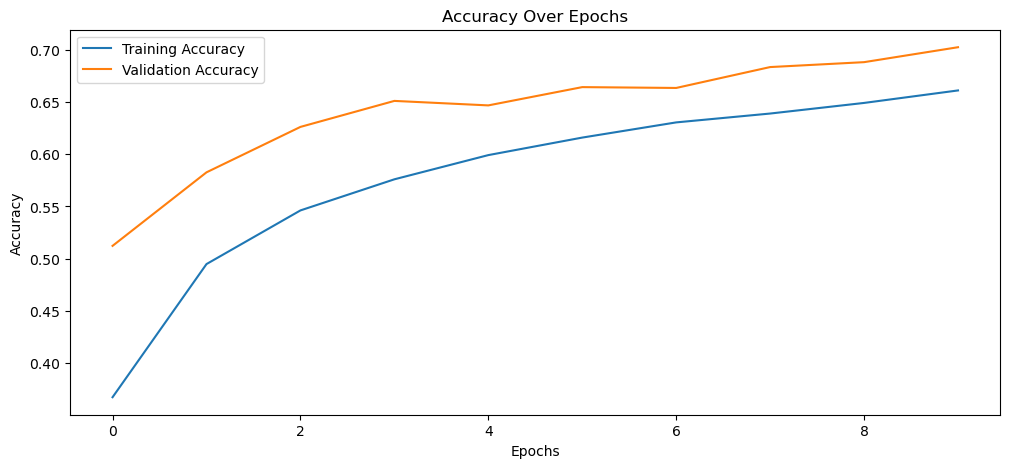

In [22]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

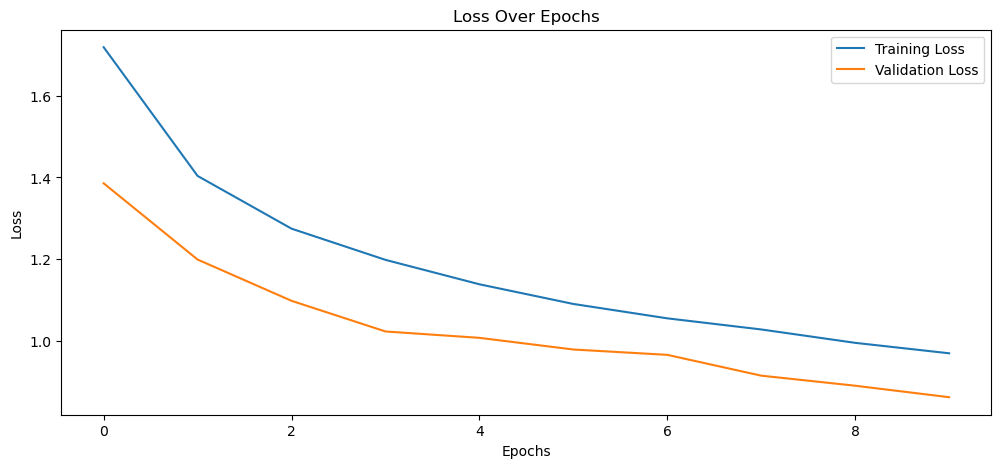

In [23]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Test the model with a custom image
custom_image_path = r"C:\Users\swaro\30 day challenge\Day15\test imagee.jpg" # Replace with your image path
custom_image = tf.keras.preprocessing.image.load_img(custom_image_path, target_size=(32, 32))
custom_image_array = tf.keras.preprocessing.image.img_to_array(custom_image) / 255.0
custom_image_array = tf.expand_dims(custom_image_array, axis=0)

In [32]:
# Predict the class of the custom image
prediction = model.predict(custom_image_array)
predicted_class = class_names[tf.argmax(prediction[0])]
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 23ms/step
Predicted Class: Deer


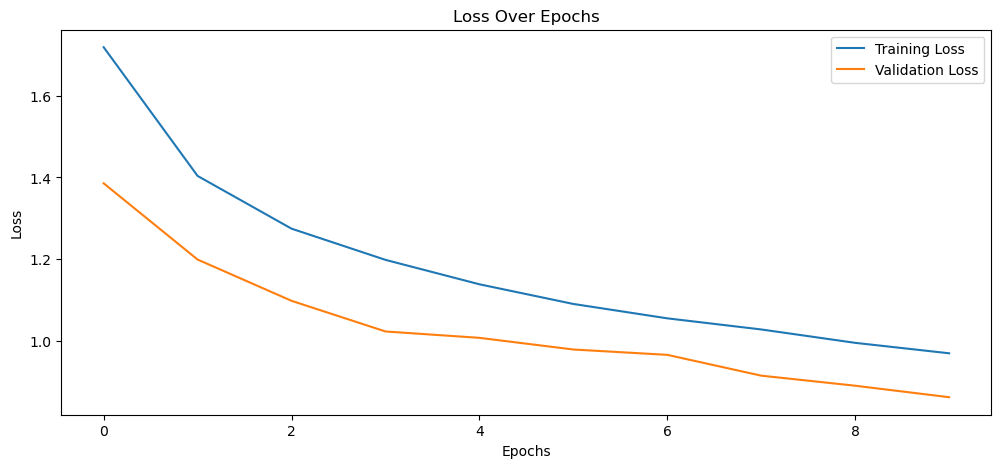

In [33]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

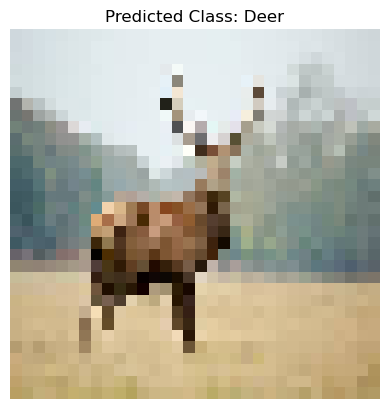

In [34]:
# Display the custom image with the predicted class
plt.imshow(custom_image)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()